# Social Network Analysis of the 2010-2021 Conservative Government

## 1. Introduction

The UK is in a period of significant political instability. Over the past six years the country has witnessed five new prime ministers, as many as seen in the preceding 38 years. These six years have featured a number of politically significant moments for the country, not least Brexit, partygate and a new record for the shortest serving prime minister in history (50 days). This makes it an interesting time for British politics and is the motivation behind this study - an analysis of the networks of prime ministers and their cabinet ministers - to better understand the role that networks play within government. 

This study will be a social network analysis (SNA) of people who have held the position of cabinet minister over the course of the Conservative government that has been in place since 2010. 

## 2. Data

The dataset used for this study will be the WhoGov dataset, specifically the 'WhoGov_within_V2.0' [as found here](https://politicscentre.nuffield.ox.ac.uk/whogov-dataset/), and as described in Nyrup and Bramwell (2020). This dataset won the 202_ for best dataset in comparative politics.

The dataset contains cabinet data for 1966-2021 for all countries with a population of more than 400,000. In this study I will be analysing only the UK, focussing on the current tenure of Conservative government for which there is data available up to 2021. This includes 74 unique cabinet members in total. 

Cabinet members will be defined according to the variable 'core' which "takes the value of 1 if a person is percieved as beng a core member of the cabinet" ([as defined in the WhoGov Codebook](https://politicscentre.nuffield.ox.ac.uk/media/4117/whogov_codebook.pdf)) and is "coded manually on a country by country basis.". For the UK it covers all major cabinet positions.

For the purpose of this study it will be assumed that ministers who sat in cabinet in the same year as another cabinet minister will be effectively 'in office in the same cabinet'.


## 3. Data preparation

This study will utilise Python pandas - an open source package commonly used for applying data science tasks and is particulalrly helpful when working with data.

The first step is to import the package and read in the data as a dataframe.

In [1]:
import pandas as pd

whogov = pd.read_excel('WhoGov_within_V2.0.xlsx')
whogov = pd.DataFrame(whogov)

A number of helpful pandas functions can be used to become familiar with the dataset.

In [2]:
# View dataset column headers
whogov.columns

Index(['year', 'country_isocode', 'country_name', 'id', 'position', 'name',
       'title', 'gender', 'birthyear', 'deadyear', 'party', 'party_english',
       'party_otherlanguage', 'whogov_partyid', 'partyfacts_id', 'core',
       'minister', 'leader', 'classification', 'portfolio_1', 'prestige_1',
       'portfolio_2', 'prestige_2', 'portfolio_3', 'prestige_3', 'portfolio_4',
       'prestige_4', 'm_finance', 'm_defense', 'm_agriculture',
       'm_foreignaffairs'],
      dtype='object')

In [3]:
# View a sample of the data
whogov.sample(n = 5)

year country_isocode country_name    id  \
69089   2015             FJI         Fiji  1058   
241400  2016             VEN    Venezuela  1311   
173124  2004             PRY     Paraguay   536   
102908  1977             ISR       Israel   273   
115700  1993             KWT       Kuwait   583   

                                                 position  \
69089   Min. Of Finance, Public Enterprises, Public Se...   
241400                         Min. Of Indigenous Peoples   
173124              Min. Of Public Works & Communications   
102908                 Min. Of Transport & Communications   
115700                               Ambassador To The Us   

                                       name title  gender  birthyear  \
69089                   Aiyaz Sayed-Khaiyum   NaN    Male     1965.0   
241400                          Clara Vidal   NaN  Female        NaN   
173124                Jose Alberto Alderete   NaN    Male        NaN   
102908                                  NaN   NaN     NaN        NaN   
115700  Muhammad Al-Sabah Al-Salim Al-Sabah   Dr.    Male     1955.0   

        deadyear  ...                  portfolio_2 prestige_2  \
69089   A (2021)  ...                Civil Service     Medium   
241400       NaN  ...                          NaN        NaN   
173124       NaN  ...  Construction & Public Works     Medium   
102908       NaN  ...                    Transport     Medium   
115700  A (2022)  ...                          NaN        NaN   

                         portfolio_3 prestige_3  portfolio_4  prestige_4  \
69089   Communications & Information     Medium          NaN         NaN   
241400                           NaN        NaN          NaN         NaN   
173124                           NaN        NaN          NaN         NaN   
102908                           NaN        NaN          NaN         NaN   
115700                           NaN        NaN          NaN         NaN   

        m_finance  m_defense m_agriculture m_foreignaffairs  
69089           1        0.0             0                0  
241400          0        0.0             0                0  
173124          0        0.0             0                0  
102908          0        0.0             0                0  
115700          0        0.0             0                0  

[5 rows x 31 columns]

In [4]:
# See the shape of the dataset (rows, columns)
whogov.shape

(249957, 31)

### 3.1 Filtering
Once familiar with the dataset, it can then be filtered for the relevant observations and variables. Filters will be applied for Great Britain, the years 2010-2021 and for cabinet ministers only (core = 1).

Variables not required for this analysis can be removed and the index reset.

In [5]:
# Apply filters
cbt_ministers = whogov[(whogov.year > 2009) & (whogov.country_isocode == 'GBR') & (whogov.core == 1)]

# Select only relevant columns
cbt_ministers = cbt_ministers.loc[:,['year', 'name', 'leader']]

# Reset the index
cbt_ministers.reset_index(drop = True)

year                          name  leader
0    2010  David William Donald Cameron       1
1    2010  Nicholas William Peter Clegg       0
2    2010  George Gideon Oliver Osborne       0
3    2010            John Vincent Cable       0
4    2010                  Eric Pickles       0
..    ...                           ...     ...
252  2021                  Alister Jack       0
253  2021                  Grant Shapps       0
254  2021                    Simon Hart       0
255  2021                Therese Coffey       0
256  2021                 Michael Ellis       0

[257 rows x 3 columns]

Storing the names of prime ministers (leaders) in a list will enable them to be identified later in the analysis. This variable can then be removed. 

In [6]:
# Create list of leaders
cbt_leaders = cbt_ministers[(cbt_ministers.leader == 1)]
unique_leaders = cbt_leaders.name.unique()

# Remove leader column from the dataframe
cbt_ministers = cbt_ministers.loc[:,['year', 'name']]

### 3.2 Data quality checks

The quality of the data can now be checked to understand what cleaning may be required.

First, the dataframe can be checked for null / missing / NA values using the .isnull function. Here this function is applied to each column and the number of null values for each is printed. In this dataset there are none so no action needs to be taken. 

In [7]:
# Check for null values
for column in cbt_ministers:
    count_nan = cbt_ministers[column].isnull().sum()
    print('There are ' + str(count_nan) + ' null values in column ' + "'" + str(column) + "'.")

There are 0 null values in column 'year'.
There are 0 null values in column 'name'.


The data types can be checked in each column to make sure they are as required for the analysis. For example, that numbers aren't stored as strings.

In [8]:
# Check data types
cbt_ministers.dtypes

year     int64
name    object
dtype: object

### 3.3 Create pairings

To conduct the network analysis, pairs need to be created in order for edges to be drawn between the different nodes. In this study the pairs have been defined as cabinet ministers who sat in cabinet in the same year as another cabinet minister.

To form these pairs, the dataframe has been split into multiple dataframes - one for each year - and stored in a dictionary.

In [9]:
# Create a list of unique years
unique_years = cbt_ministers.year.unique()

# Create a dictionary of dataframes for each year in cbt_ministers
dataframe_dict = {elem : pd.DataFrame() for elem in unique_years}

for key in dataframe_dict.keys():
    dataframe_dict[key] = cbt_ministers[:][cbt_ministers.year == key]

The data for each year can be viewed by calling the relevant key for each year. For example: 

In [10]:
dataframe_dict[2010].head()

year                          name
233686  2010  David William Donald Cameron
233687  2010  Nicholas William Peter Clegg
233688  2010  George Gideon Oliver Osborne
233689  2010            John Vincent Cable
233690  2010                  Eric Pickles

Splitting the dataset into multiple dataframes allows the pairings for each year to be created in isolation of other years, removing a level of complexity. The dictionary can then be iterated through to create the pairings for each year.

The itertools combination module provides a useful function to find all possible pairings of names within each dataframe. The map function is then used to apply this function to each dataframe as we iterate through the dictionary.

In [11]:
from itertools import combinations
# Iterate through the dictionary to create value pairs
pairings_dict = {}
for key in dataframe_dict:
    pairings_dict[key] = [': '.join(map(str, comb)) for comb in combinations(dataframe_dict[key].name.unique(), 2)]

pairings_dict[2010][:10]

['David William Donald Cameron: Nicholas William Peter Clegg',
 'David William Donald Cameron: George Gideon Oliver Osborne',
 'David William Donald Cameron: John Vincent Cable',
 'David William Donald Cameron: Eric Pickles',
 'David William Donald Cameron: Jeremy Hunt',
 'David William Donald Cameron: Liam Fox',
 'David William Donald Cameron: Michael Gove',
 'David William Donald Cameron: Chris Huhne',
 'David William Donald Cameron: Caroline Spelman',
 'David William Donald Cameron: William Jefferson Hague']

Now that the pairings have been created for each key, these can be appended to a single list. To do this we again iterate through the dictionary.

In [12]:
# Append all paired values to a list
pairings_list = []
for key in pairings_dict:
    pairings_list.append(pairings_dict[key]) 
pairings_list = sum(pairings_list, []) 

pairings_list[-10:]

['Alister Jack: Grant Shapps',
 'Alister Jack: Simon Hart',
 'Alister Jack: Therese Coffey',
 'Alister Jack: Michael Ellis',
 'Grant Shapps: Simon Hart',
 'Grant Shapps: Therese Coffey',
 'Grant Shapps: Michael Ellis',
 'Simon Hart: Therese Coffey',
 'Simon Hart: Michael Ellis',
 'Therese Coffey: Michael Ellis']

It is possible that there may now be duplicates in the list as cabinet ministers may have worked together in different years. To remove any duplicates the list can be converted to a dictionary and back to a list.

Then the list can be converted back to a dataframe and the columns created for 'name1' and 'name2' of each pairing. The resulting dataframe can be seen below.

In [27]:
# Remove duplicates by converting to dictionary and back to a list
pairings_list = list(dict.fromkeys(pairings_list)) 

# Change list to a dataframe
pairings = pd.DataFrame(pairings_list, columns = ['name'])

# Split the pairings across two columns
pairings = pairings['name'].str.split(": ", n = 1, expand = True)
pairings.rename(columns={0:'name1', 1:'name2'}, inplace=True)


## 4. Social Network Analysis

The social network can be visualised through the use of edges and vertices. Networkx along with Matplotlib are useful packages to create plots of social networks and networkx has functions to support analysis of networks.

To begin, a graph object (G) needs to be created. To do so an edgelist must be defined for the graph - the nodes to be used and the edges between them. The package networkx has a useful function for this: 'from_pandas_edgelist'. The source nodes are defined as 'name1' and the target nodes as 'name2'. This graph will be undirected so it doesn't matter which name in each pairing is the source and which is the target, we just want an edge drawn between them. 

In [17]:
import networkx as nx # graph drawing package
import matplotlib.pyplot as plt # enables a spring layout graph (networkx uses matplotlib)

G = nx.from_pandas_edgelist(pairings,
                           source = 'name1',
                           target = 'name2',
                           create_using = nx.Graph())

We can then check the summary information of the graph - 74 nodes and 1131 edges. We know that there are 74 unique cabinet ministers in the dataset which gives confidence that all cabinet ministers have been created as nodes. 

In [ ]:
nx.info(G)

Before plotting the graph, the colours of the nodes can be defined by using a colour map list. I want the node at the center to be red to stand out from the others. The rest of the nodes will be gold. This list will then be called when drawing the graph to set the node colours. 

In [18]:
# Set node colours
color_map = [] 
for node in G:
    if node in nx.center(G):
        color_map.append('red')
    else:
        color_map.append('gold')

In a similar manner, we can also distinguish the prime ministers in the visualisation by changing the size of the nodes. To do this we can use the list of unique leaders  created earlier. The (former) prime ministers included in the dataset are: David Cameron, Theresa May and Boris Johnson.

In [19]:
# Set node size 
size_map = [] 
for node in G:
    if node in unique_leaders:
        size_map.append(900) # size of prime minister nodes
    else:
        size_map.append(200) # size of all other nodes

Finally we can plot the graph. In the below code various aspects of the graph are customised, such as the node colours and size as we have discussed above. For this graph we will be using a spring-layout as a helpful visualisation layout to spread the nodes out across the graph.

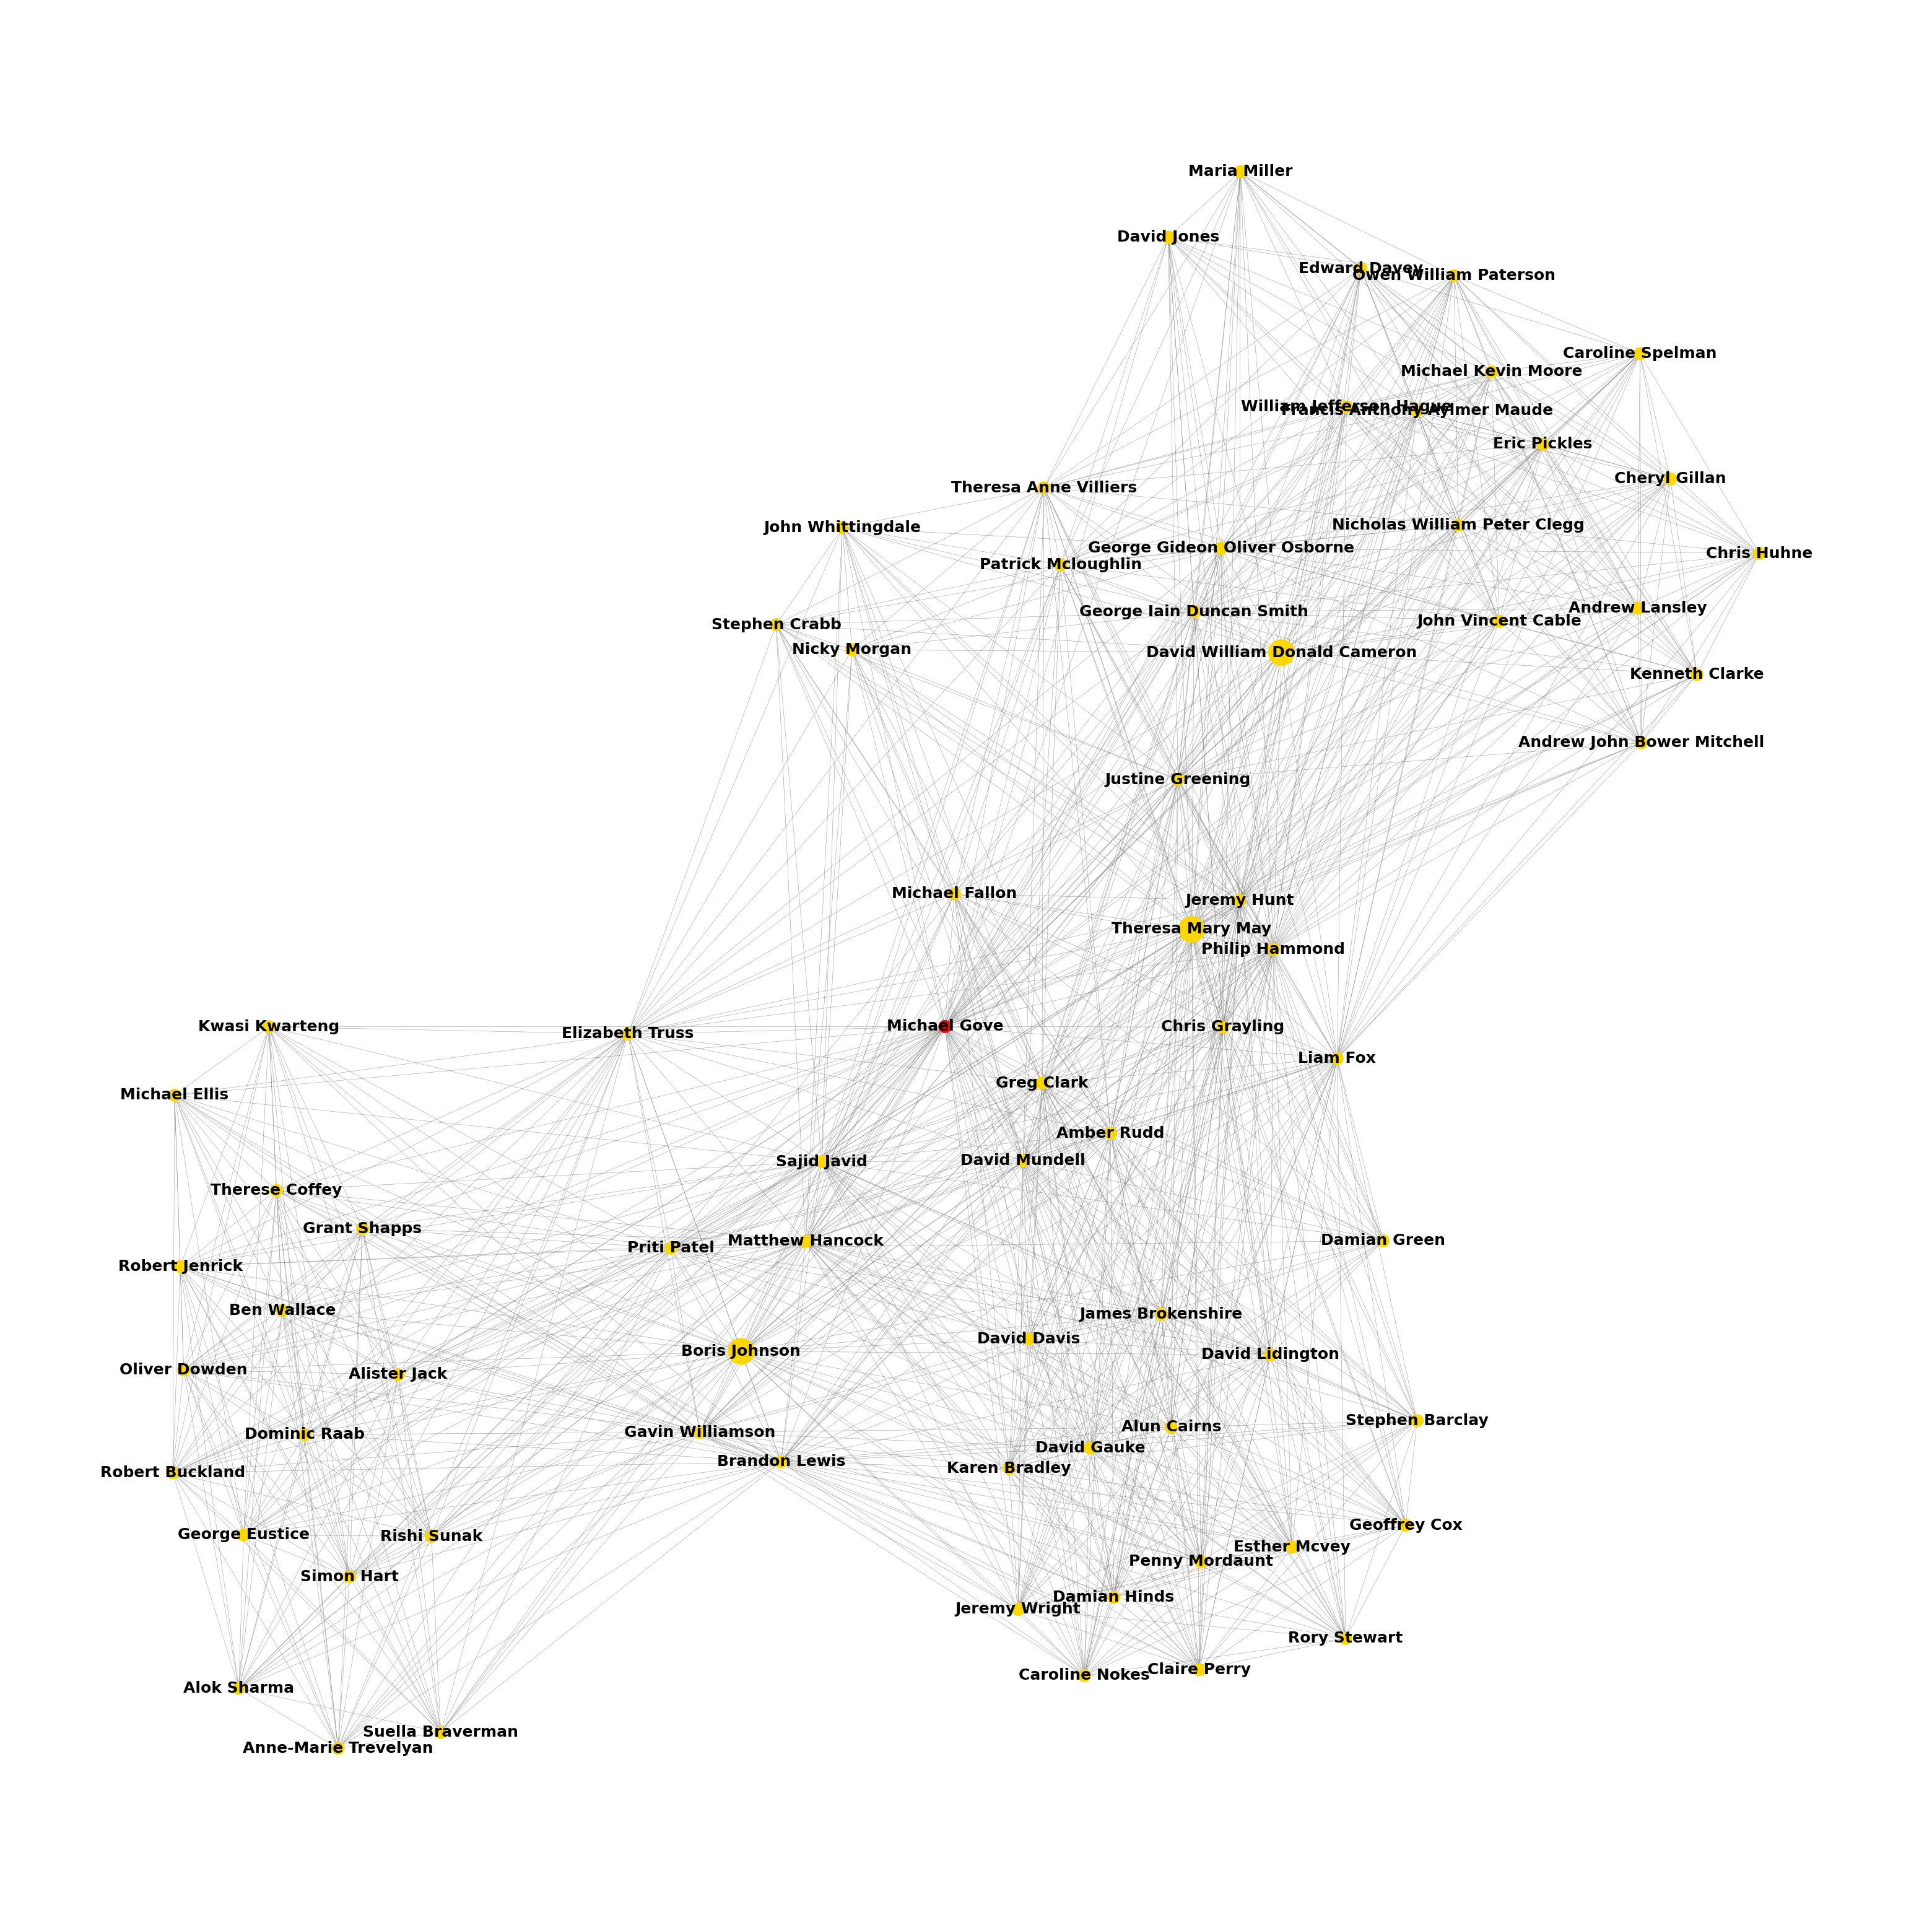

In [20]:
# Draw the graph 
fig, ax = plt.subplots(1, 1, figsize = (40, 40)) 
nx.draw_networkx(G, ax = ax, with_labels = True, font_size = 18, font_weight = 'bold',
                node_size = size_map, node_color = color_map, edge_color = 'grey',
                 width = .3)
ax.set_axis_off()
pos = nx.spring_layout(G, seed = 675)

From the above visualisation we can see that the network is well interconnected - each cabinet minister shares a high number of connections. The count of connections per node can be seen below, with a minimum of 19 (Whittingdale, Morgan, Crabb, Kwarteng, Ellis) and a maximum of 73 (Gove).

In [ ]:
count_edges = {k: v for k, v in sorted(G.degree(), key=lambda item: item[1])}
count_edges

The three prime ministers can be identified in the visualisation by the larger nodes - David Cameron, Theresa May and Boris Johnson - and there is arguably a weakly distinct cluster formed around each of them. The fact that the clusters are weak suggests that they share a number of cabinet ministers, whereas if there were three unconnected clusters that would mean that non of the prime ministers shared any of the same members of cabinet.

The centre of the network is identified by the red node - Michael Gove - meaning that Michael Gove's eccentricity is equal to the radius (i.e. the distance between Michael Gove and the furthest node is equal to the radius of the graph). Being at the centre of the network suggests that Michael Gove is the best connected cabinet minister, however there are different measures of centrality that I will cover in the further analysis below.

Before continuing, the graph can be saved.

In [ ]:
fig.savefig('cabinet-network.png') # save the plot as a png

### 4.1 Small world phenomena
The small world phenomena is the concept that the human network is small such that human connections are only ever six or fewer connections away from each other. One aspect of this phenomena is triadic closure - the tendency of people that share connections in a social network to become connected.

This tendency can be measured in two ways: i) by taking the average of local clustering; ii) by calculating the transitivity, and the outputs compared. These two measures will give an indication as to the tendency of cabinet ministers who share similar connections to become connected. 

Networkx contains some useful functions to calculate these.

In [ ]:
# Network average of local clustering
nx.average_clustering(G)

In [ ]:
# Transitivity
nx.transitivity(G)

This network has both a high average clustering and transitivity coefficient meaning that the network contains groups of nodes that are densely connected. 

### 4.2 Scale free networks
Scale free networks are networks where a small number of people have a large number (degree) of connections and a large number of people have a small number (degree) of connections. 

Whether the network is a scale free network can be analysed through different measures of centrlaity. For this particular study it will be interesting to assess whether i) there is a scale free network; and if so ii) whether the few people with a large degree of connections tend to be prime ministers.

The network that I visualised above can be extended to add a colour scale based on the centrlaity of each node. Instead of plotting multiple networks, a for loop can be used to repeat the plot for each measure.

First the measures need to be defined and added into a list of dictionaries.

In [ ]:
# Define the measures of centrality (each returns a dictionary)
deg = nx.degree_centrality(G)
close = nx.closeness_centrality(G)
bet = nx.betweenness_centrality(G)
eig = nx.eigenvector_centrality(G)

# Add these dictionaries into a list
measures = [deg, close, bet, eig]

# Add the titles for each plot into a list
measure_names = ['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality']

# Add the file names for each plot to a list so they can be saved
plot_names = ['dc-cabinet-ministers.png', 'cc-cabinet-ministers.png', 'bc-cabinet-ministers.png', 'ec-cabinet-ministers.png'] 

The different types of measures can then be iterated through and a plot drawn for each. To aid this visualisation I have used mcolors from matplotlib.

In [ ]:
import matplotlib.colors as mcolors

# Iterate through the length of measure_names to create a plot for each measure
for i in range(len(measure_names)): 
    fig, ax = plt.subplots(1, 1, figsize = (30, 30))
    nodes = nx.draw_networkx_nodes(G, pos, cmap = plt.cm.plasma,  
                                node_color = list(measures[i].values()),
                                nodelist = measures[i].keys(),
                                node_size = size_map,
                                ) 
    nodes.set_norm(mcolors.SymLogNorm(linthresh = 0.01, linscale = 1, base = 10)) 
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos,
                                  edge_color = 'grey',
                                  width = .1)
    plt.title(measure_names[i], size = 24) 
    plt.colorbar(nodes) 
    plt.axis('off') 
    pos = nx.spring_layout(G, seed = 675)
    plt.savefig(plot_names[i]) 
    plt.show()

#### 4.2.1 Degree Centrality
Degree centrality ranks the importance of a node accroding to its connectivity. As has been touched on already in this analysis, Michael Gove was identified as having the greatest degree centrality. Of the former prime ministers Theresa May has the greatest. 

Interestingly, of the two proceeding prime minsters to Boris Johnson - Liz Truss and Rishi Sunak - Sunak secured the greater percentage of votes amongst Conservative MPs in the leadership election despite having a lower degree centrality to Truss (Truss of course went on to win the leadership contest in the Tory membership voting round).

#### 4.2.2 Closeness Centrality
Closeness centrality assesses how close each nodes are to other nodes by calculating the average shortest distance from each node to all other nodes in the graph.

For this network, this measure of centrality appears to be comparable to degree centrality. Michael Gove is identified as being at the centre, with other cabinet ministers with high centrality being Hancock, Javid, Hammond, Hunt and May.

#### 4.2.3 Betweeness Centrality
Betweeness centrality measures how often a node acts as a bridge on the shortest path between two other nodes.

This measure of centrality is also similar to the previous measures for this particualr network, with Michael Gove identified at the centre and, again, no particualr distinction between former prime ministers and the rest of the network.

#### 4.2.4 Eigenvector Centrality
Eigenvector centrality ranks the importance of each node by the relative importance of the nodes next to it.

Whilst the nodes with the greatest centrality remains similar to the above measures, there is a difference in the centrality of nodes across the clusters on the periphery of the network (e.g. when comparing Suella Braverman to Jeremy Wright to Andrew Lansley). This suggests that despite the nodes on the periphery tending to generally have low centrality scores, some of these are better connected than others when considering their eigenvector centrality - i.e. certain clusters are better connected to important cabinet ministers.

Overall, there are negligible differences across degree, closeness and betweeness centrality however these graphs do provide an insightful view of which cabinet ministers have been favoured by multiple prime minsters, and which have not and are in dark blue on the periphery of the network.

### 4.3 Homophily
Homophily is the phenomena that actors with similar attributes tend to group together.

Given that the time period covered in this study only includes one party in Government, homophily can not be detected provided characteristics of each node. If, however, the date range of this analysis was expanded to includ another party in government then we would likely see two distinct clusters would be visible in the network - whilst not impossible, it is unlikely that any cabinet minister would have sat in cabinet for opposing party governments.

## Reference list

_Nyrup, Jacob and Stuart Bramwell. 2020. Who Governs? A New Global Dataset on Members of Cabinets, American Political Science Review, 114(4), 1366-1374_